# Image Deraining Project

### Imports

-0.9528312608599663
torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


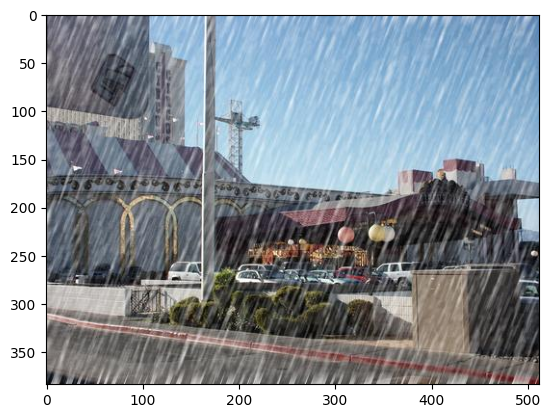

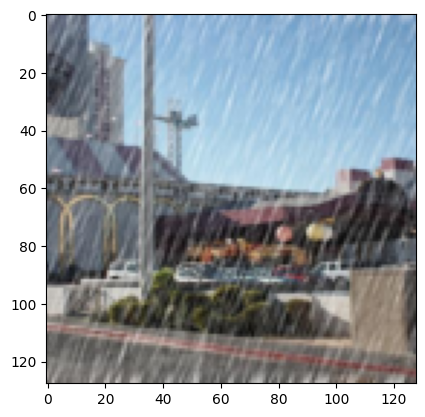

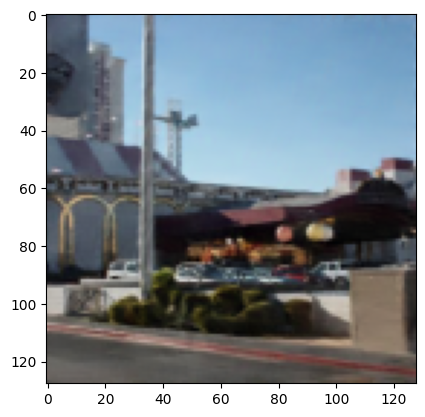

In [2]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from models.prenet import PReNet, PReNet_r, PReDecoderNet, \
    PReLSTMNet, PReComboNet, PReHAYULANet, PReAENet, PReAENetPL

DEVICE = torch.device(
    'cuda') if torch.cuda.is_available() else torch.device('cpu')

model_dir = 'saved_state_AEATPL.pth'
prenet_dir = 'trained_models/PReNet/Low Data/best_model.pth'
img_dir = 'data/rain_streak/training/rainy_image/555_5.jpg'

net = PReAENetPL(device=DEVICE).to(DEVICE)
net_dict = torch.load(model_dir)
net.load_state_dict(net_dict)

net1 = PReNet().to(DEVICE)
net1_dict = torch.load(prenet_dir)
print(sorted(net1_dict['validation_losses'])[0])


img = Image.open(img_dir).convert('RGB')

plt.figure()
plt.imshow(img)

transforms = transforms.Compose([
            transforms.Resize(size=128),
            transforms.CenterCrop([128, 128]), 
            transforms.ToTensor(),
        ])

img = transforms(img)
img_in = img[None,:,:,:]

net.eval()
img_out = net(img_in.to(DEVICE))
img = img.cpu().detach().numpy()
img = np.moveaxis(img, 0,-1)
plt.figure()
plt.imshow(img)

print(img_out.shape)
img_out = torch.squeeze(img_out)
img_out = img_out.cpu().detach().numpy()
img_out = np.moveaxis(img_out, 0,-1)
plt.figure()
plt.imshow(img_out)